## Data discovery

#### Concatenated data longitude and latitude histogram

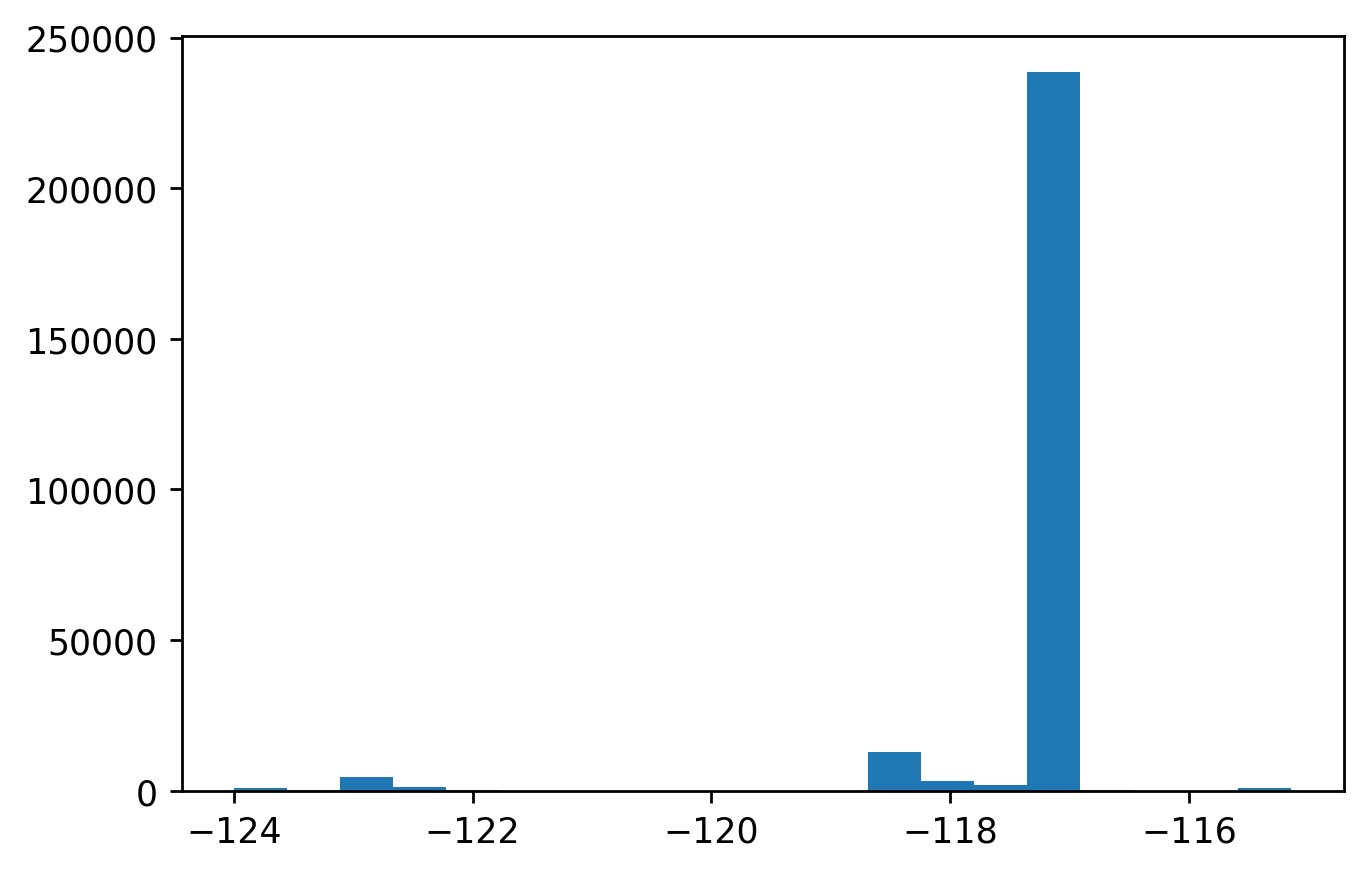

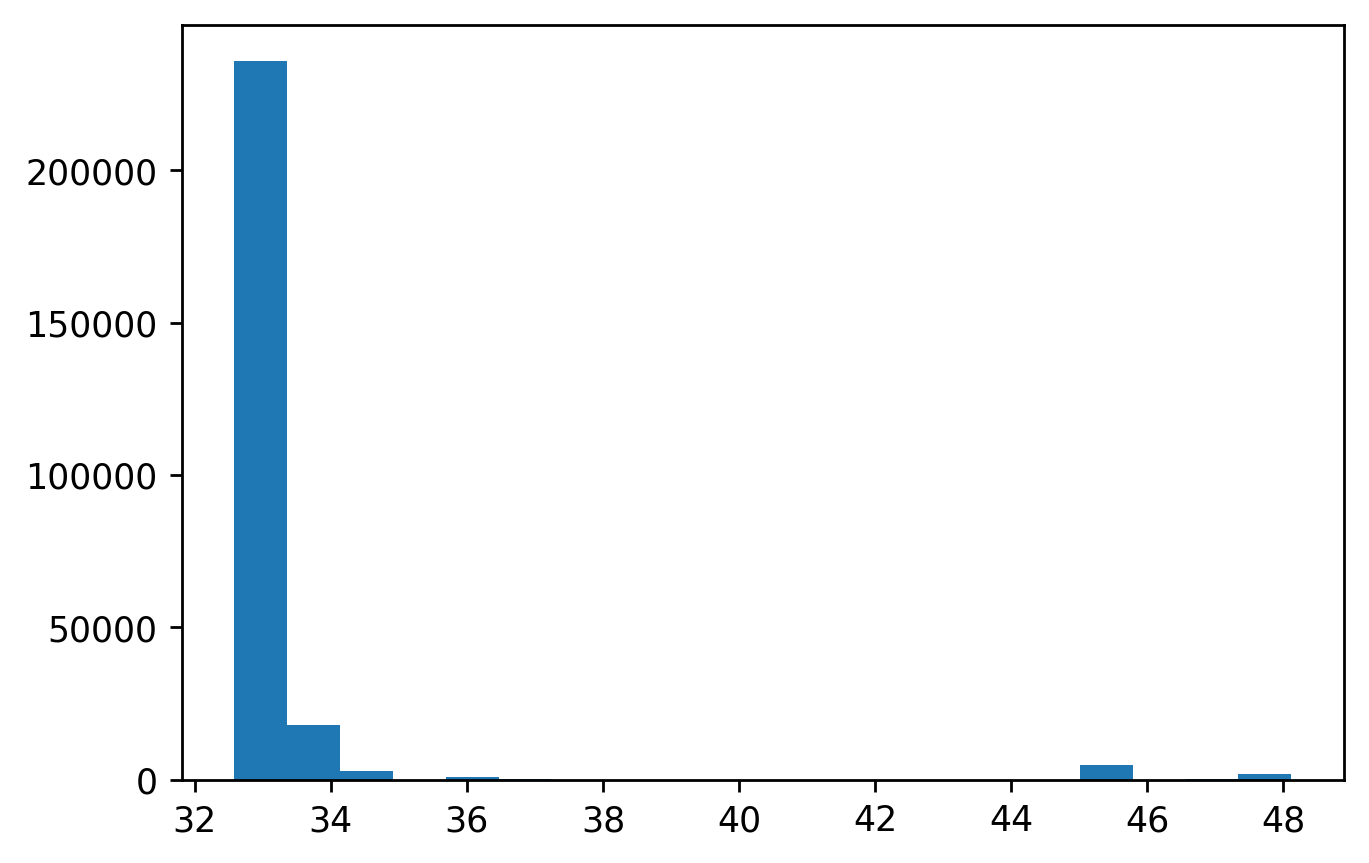

In [1]:
from discovery.services import *
import pandas as pd
import glob, os
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 250
read_csv_partial = lambda x: pd.read_csv(x, index_col=0, parse_dates=True, date_parser=dateparse, infer_datetime_format=True)

df = pd.concat(map(read_csv_partial, glob.glob(os.path.join('data', "*.csv")))).dropna()
    
plt.figure()
plt.hist(df.longitude, 20);
plt.figure()
plt.hist(df.latitude, 20);

#### Part of day 

In [2]:
morningTime = mornings(df)
dayTime = daytimes(df)
nightTime = nights(df)

print("morning time share", len(morningTime) / len(df)) 
print("day time share", len(dayTime) / len(df)) 
print("night time share", len(nightTime) / len(df)) 

morning time share 0.17631967717924787
day time share 0.3153396532246181
night time share 0.26295306932862805


#### Share of business days

In [3]:
bDays, weekends = split_b_days_weekends(df)
bDaysShare = len(bDays) / len(df)
bDaysShare


0.7561841861660124

#### Concatenated data locations clusters - K-means

/Users/nikkatalnikov/Desktop/work/awareful/discovery/services.py:46: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  urcrnrlat=df.latitude.max() + bound)
/Users/nikkatalnikov/Desktop/work/awareful/discovery/services.py:49: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m.drawstates(linewidth=0.1)


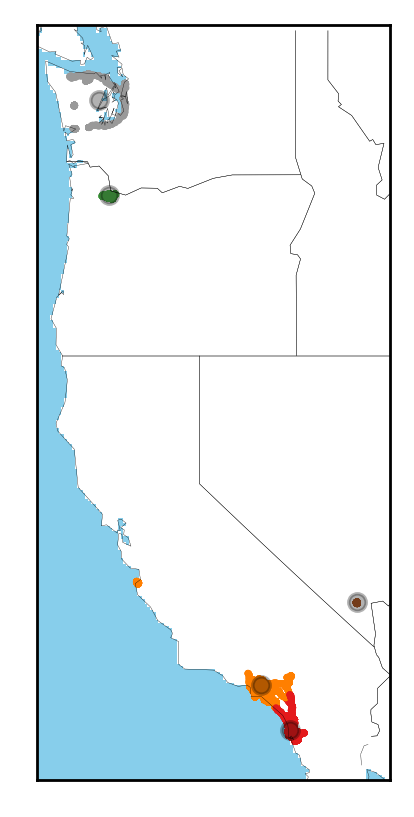

In [4]:
from sklearn.cluster import KMeans

m = draw_map(df)

kmeans = KMeans(n_clusters=5).fit(df)
clusters = kmeans.predict(df)

plt.xlim(df.longitude.min(), df.longitude.max())
plt.ylim(df.latitude.min(), df.latitude.max())
plt.axis('scaled')

x, y = m(df.longitude.to_list(), df.latitude.to_list())
m.scatter(x, y, s=1, c=clusters, cmap='Set1');
centroids = kmeans.cluster_centers_
x_c, y_c = m(centroids[:, 1], centroids[:, 0])
m.scatter(x_c, y_c, c = 'black', s=25, alpha=0.3);


#### Concatenated data locations clusters - DBSCAN

/Users/nikkatalnikov/Desktop/work/awareful/discovery/services.py:46: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  urcrnrlat=df.latitude.max() + bound)
/Users/nikkatalnikov/Desktop/work/awareful/discovery/services.py:49: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m.drawstates(linewidth=0.1)


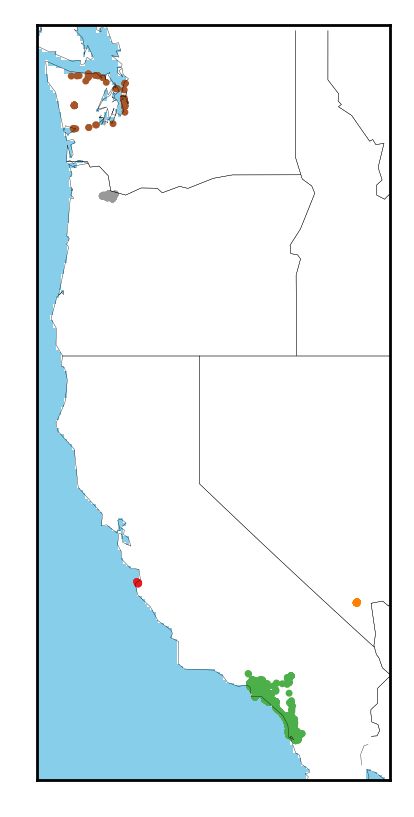

In [5]:
from sklearn.cluster import DBSCAN

smapledDf = df.sample(20000)
m = draw_map(df)

db = DBSCAN(eps=1, min_samples=50, n_jobs=-1).fit(smapledDf)
x, y = m(smapledDf.longitude.to_list(), smapledDf.latitude.to_list())
m.scatter(x, y, s=1, c=db.labels_, cmap='Set1')
clusters = db.labels_
plt.show()

#### Single sample locations clusters - DBSCAN

/Users/nikkatalnikov/Desktop/work/awareful/discovery/services.py:46: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  urcrnrlat=df.latitude.max() + bound)
/Users/nikkatalnikov/Desktop/work/awareful/discovery/services.py:49: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m.drawstates(linewidth=0.1)


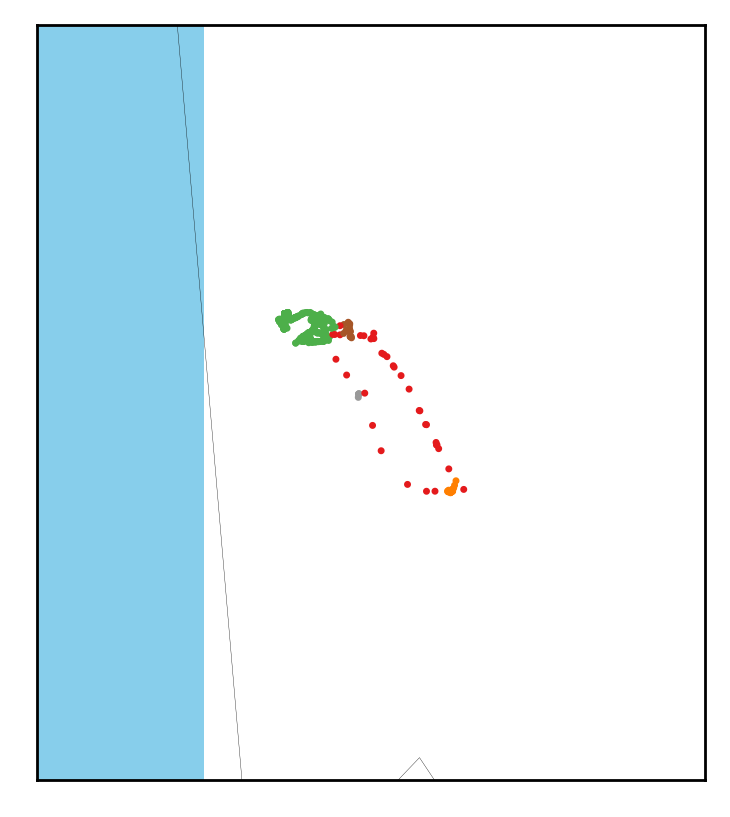

In [6]:
southCaliforniaSample = read_csv_partial('data/0BFC35E2-4817-4865-BFA7-764742302A2D.absolute_locations.csv').dropna()
bDaysSouthCalSample = split_by_days(southCaliforniaSample)
singleBDaySouthCalSample = bDaysSouthCalSample[1]

m = draw_map(southCaliforniaSample, bound=0.1)

# 0.001 degree = approx. 100 m in California
db_sc = DBSCAN(eps=0.002, min_samples=5, n_jobs=-1).fit(southCaliforniaSample)
x, y = m(southCaliforniaSample.longitude.to_list(), southCaliforniaSample.latitude.to_list())
m.scatter(x, y, s=1, c=db_sc.labels_, cmap='Set1')
plt.show()

#### Single sample locations clusters (single business day morning) - DBSCAN

                      latitude   longitude
timestamp                                 
2015-10-21 05:00:58  32.873398 -117.226866
2015-10-21 05:01:30  32.873398 -117.226866
2015-10-21 05:04:05  32.873338 -117.226945
2015-10-21 05:05:29  32.873315 -117.226941
2015-10-21 05:06:30  32.873220 -117.226893


/Users/nikkatalnikov/Desktop/work/awareful/discovery/services.py:46: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  urcrnrlat=df.latitude.max() + bound)
/Users/nikkatalnikov/Desktop/work/awareful/discovery/services.py:49: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m.drawstates(linewidth=0.1)


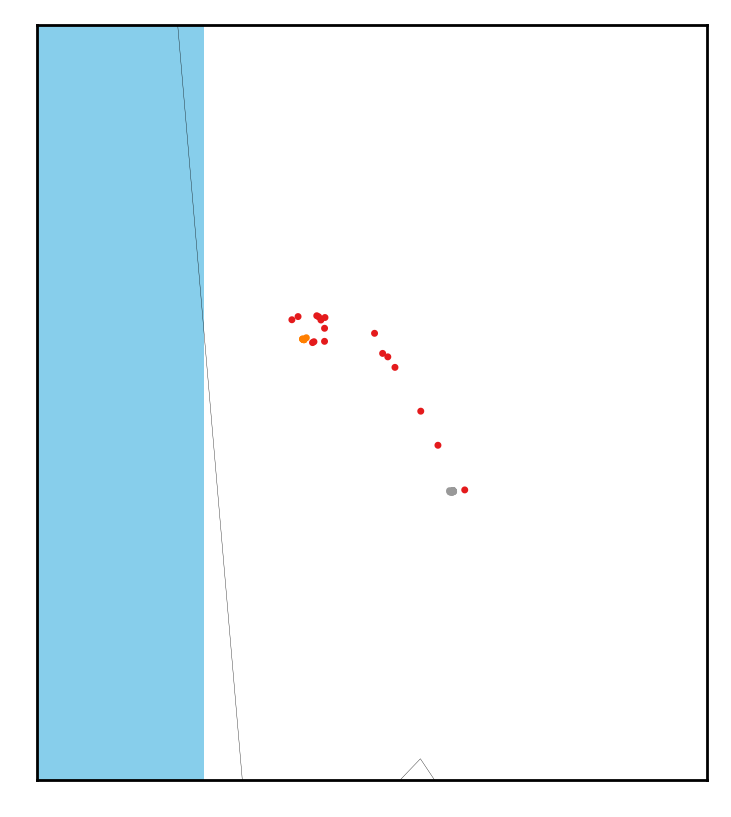

In [7]:
morningDf = mornings(singleBDaySouthCalSample)
print(morningDf.head())

m = draw_map(singleBDaySouthCalSample, bound=0.1)

if not morningDf.empty:
    # 0.001 degree = approx. 100 m in California
    db_sc = DBSCAN(eps=0.002, min_samples=5, n_jobs=-1).fit(morningDf)
    x, y = m(morningDf.longitude.to_list(), morningDf.latitude.to_list())
    m.scatter(x, y, s=1, c=db_sc.labels_, cmap='Set1')
    plt.show()

#### Single sample locations clusters (single business day working day) - DBSCAN

Empty DataFrame
Columns: [latitude, longitude]
Index: []


/Users/nikkatalnikov/Desktop/work/awareful/discovery/services.py:46: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  urcrnrlat=df.latitude.max() + bound)
/Users/nikkatalnikov/Desktop/work/awareful/discovery/services.py:49: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m.drawstates(linewidth=0.1)


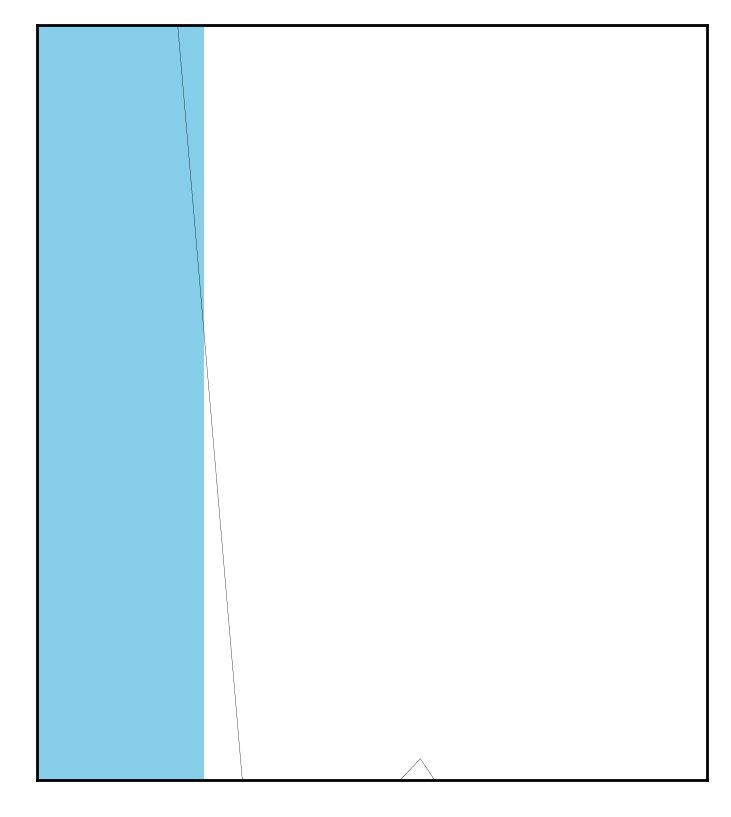

In [8]:
dayDf = daytimes(singleBDaySouthCalSample)
print(dayDf.head())

m = draw_map(singleBDaySouthCalSample, bound=0.1)

if not dayDf.empty:
    # 0.001 degree = approx. 100 m in California
    db_sc = DBSCAN(eps=0.002, min_samples=5, n_jobs=-1).fit(dayDf)
    x, y = m(dayDf.longitude.to_list(), dayDf.latitude.to_list())
    m.scatter(x, y, s=1, c=db_sc.labels_, cmap='Set1')
    plt.show()


#### Single sample locations clusters (single business day night) - DBSCAN

                      latitude   longitude
timestamp                                 
2015-10-21 20:32:15  32.873320 -117.226981
2015-10-21 20:33:03  32.872792 -117.226930
2015-10-21 20:34:28  32.873316 -117.226979
2015-10-21 20:36:08  32.873316 -117.226979
2015-10-21 20:37:25  32.873316 -117.226979


/Users/nikkatalnikov/Desktop/work/awareful/discovery/services.py:46: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  urcrnrlat=df.latitude.max() + bound)
/Users/nikkatalnikov/Desktop/work/awareful/discovery/services.py:49: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m.drawstates(linewidth=0.1)


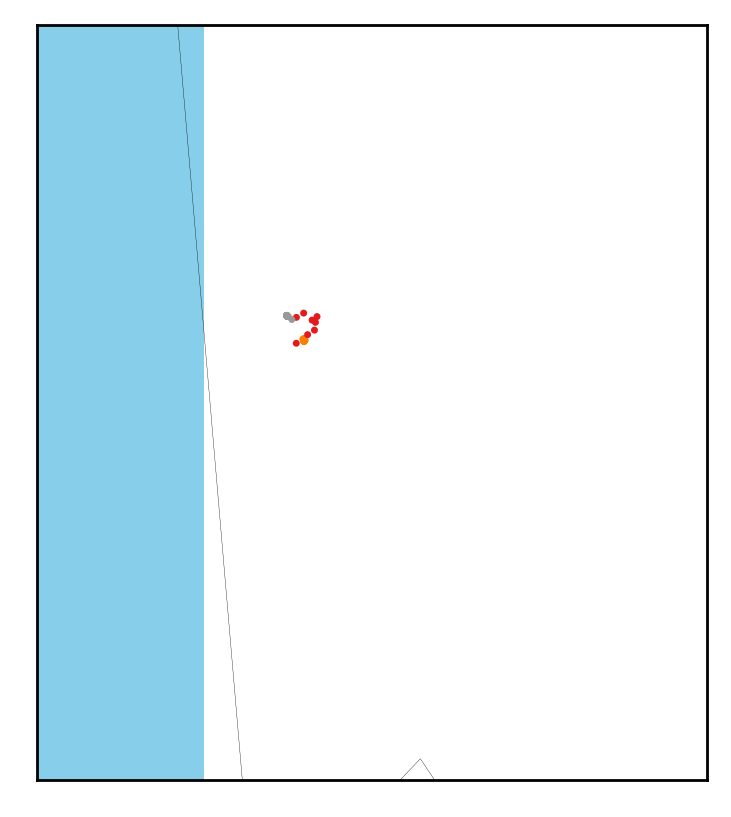

In [9]:
nightDF = nights(singleBDaySouthCalSample)
print(nightDF.head())

m = draw_map(singleBDaySouthCalSample, bound=0.1)

if not nightDF.empty:
    # 0.001 degree = approx. 100 m in California
    db_sc = DBSCAN(eps=0.002, min_samples=5, n_jobs=-1).fit(nightDF)
    x, y = m(nightDF.longitude.to_list(), nightDF.latitude.to_list())
    m.scatter(x, y, s=1, c=db_sc.labels_, cmap='Set1')
    plt.show()